In [2]:
import numpy as np

In [3]:
# chapter 7.3

obtaining the reduced form echolon form

In [198]:
A = np.array([[1, 4, 17, 4, 38], [2, 12, 46, 10, 98], [3, 18, 69, 17, 153]]).astype(float)
B = A.copy()

A[2] = A[2] - A[0] * 3
A[1] = A[1] - A[0] * 2
A[2] = A[2] - A[1] * 3/2

A[2] = A[2] / 2
A[1] = A[1] / 4

In [199]:
A

array([[ 1. ,  4. , 17. ,  4. , 38. ],
       [ 0. ,  1. ,  3. ,  0.5,  5.5],
       [ 0. ,  0. ,  0. ,  1. ,  3. ]])

In [187]:
A[1] = A[1] + - 1/2 * A[2]
A[0] = A[0] + - 4 * A[2]
A[0] = A[0] + A[1] * -4

In [188]:
# column 2 is a free variable and acts as a paramter
A[:, 2] 

array([5., 3., 0.])

In [189]:
A

array([[ 1.,  0.,  5.,  0., 10.],
       [ 0.,  1.,  3.,  0.,  4.],
       [ 0.,  0.,  0.,  1.,  3.]])

In [190]:
import scipy

In [192]:
P, L, U = scipy.linalg.lu(B)

In [202]:
P @ L @ U

array([[  1.,   4.,  17.,   4.,  38.],
       [  2.,  12.,  46.,  10.,  98.],
       [  3.,  18.,  69.,  17., 153.]])

In [203]:
# U is the echolon form

In [112]:
# 7.4 matrix rank

the rank of a matrix is the number of non-zero rows in echolon form, non-linear dependence

In [113]:
np.linalg.matrix_rank(A)

3

In [114]:
np.linalg.matrix_rank(B)

3

system of linear equations has a solution if and only if rank(A) == rank(B)

free variables may appear in the solution

the system has a unique solution if there is no free variables

a linear system can only have no, one or infinetly many solutions, it cannot have a finite number of solutions (other than 1 solution)

A unique solution exists if:
    - there are as many variables as equations
    - the rank(A) == rank(B), that is there is no free variables
if #variables == # equations then A is square, to deterime whether A is full rank, that is rank(A) == rank(B) we calcualte the determinant

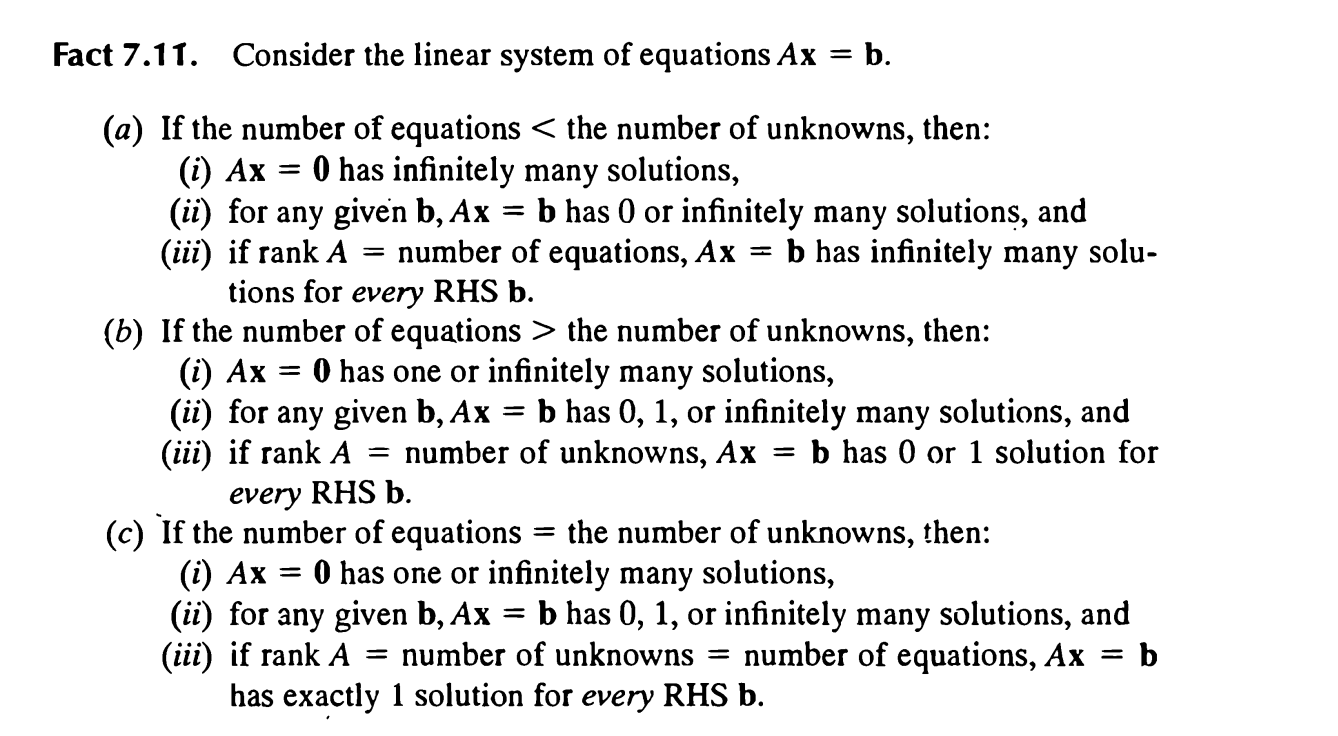

In [128]:
# 8.6

Matrix is non-singular means that it represents a system with a unique solution
That is full-rank

If a matrix is non-singular, it can be used to find the unique solution to a system of linear equations.
For the below system of equations the inverse of $A$ is needed to calcuated $x$, a unique solution vector. 
Only if $A$ is non-singular it can be inverted, as only then $x$ is a singular solution vector.

$$ \mathbf{A} \mathbf{x} = \mathbf{b} $$
$$ \mathbf{x} = \mathbf{b} \mathbf{A}^{-1} $$

In [170]:
A = np.random.randn(16).reshape(4,4)
x = np.random.randn(4)[:, None]
b = A @ x

In [171]:
np.linalg.matrix_rank(A)

4

the inverse of a matrix is the matrix that yields indentiy in multiplication

In [177]:
(A @ np.linalg.inv(A)).round()

array([[ 1.,  0., -0.,  0.],
       [-0.,  1., -0.,  0.],
       [-0.,  0.,  1.,  0.],
       [ 0.,  0., -0.,  1.]])

In [172]:
np.linalg.inv(A) @ b

array([[-0.62259145],
       [-0.02964985],
       [ 2.05570654],
       [ 2.66769228]])

In [173]:
x

array([[-0.62259145],
       [-0.02964985],
       [ 2.05570654],
       [ 2.66769228]])

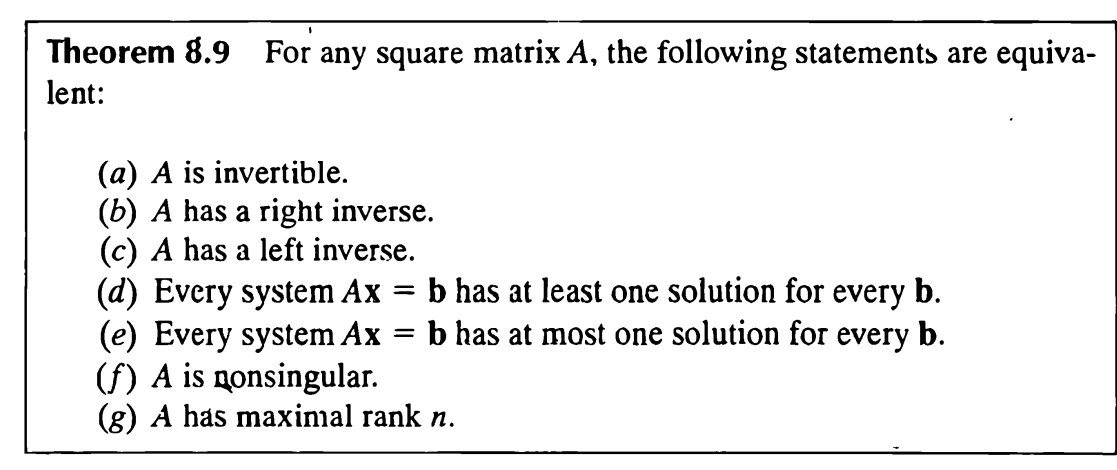

In [174]:
# 8.7

In [1]:
# quasi newton

In [2]:
import sympy as sp

In [12]:
syms = sp.symbols(['x_t', 'y_t', 'a', 'b', 'c', 'd'])
xt, yt, a, b, c, d = syms

In [13]:
Z = sp.Matrix([xt, yt])
A = sp.Matrix([[a,b,],[c,d]])

In [20]:
A.eigenvals()

{a/2 + d/2 - sqrt(a**2 - 2*a*d + 4*b*c + d**2)/2: 1,
 a/2 + d/2 + sqrt(a**2 - 2*a*d + 4*b*c + d**2)/2: 1}

In [88]:
f_a = sp.lambdify(args=[a,b,c,d], expr=A)
f = sp.lambdify(args=[a,b,c,d], expr=A @ Z)

array([[0.1, 0.2],
       [0.1, 0.1]])

In [66]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

Matrix([
[a, b],
[c, d]])

In [105]:
f = lambda x: x ** 2
f = lambda x: (x-10)**3-100*x**2-x+100
f = lambda x: f_a(.1,.2,.1,.1) @ x ** 2

In [106]:
x = np.linspace(-10,10,100)
# plt.plot(x, f(x, x))

In [107]:
f(fsolve(f, x0=[4,5]))

C:\Users\LukasGrahl\miniforge3\envs\mamba_env_memoire2\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


array([1.22174777e-236, 7.13853958e-237])